In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


SyntaxError: invalid syntax (<ipython-input-34-c7919b66e52f>, line 4)

In [40]:
!conda install -c conda-forge folium=0.5.0 --yes

import folium

Solving environment: ...working... done

# All requested packages already installed.



In [4]:
crime_data = pd.read_csv("CrimeIncidentReport2021.csv")

# Data types of all the features

In [5]:
crime_data.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP     float64
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                 int64
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART               float64
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

# Structure of the data

In [6]:
crime_data.loc[1]

INCIDENT_NUMBER                                    PLTEST002
OFFENSE_CODE                                            3114
OFFENSE_CODE_GROUP                                       NaN
OFFENSE_DESCRIPTION                     INVESTIGATE PROPERTY
DISTRICT                                                  B2
REPORTING_AREA                                           289
SHOOTING                                                   0
OCCURRED_ON_DATE                         2021-05-12 00:00:00
YEAR                                                    2021
MONTH                                                      5
DAY_OF_WEEK                                        Wednesday
HOUR                                                       0
UCR_PART                                                 NaN
STREET                                         SCHROEDER PLZ
Lat                                                  42.3337
Long                                                -71.0919
Location               (

# Missing value count for all features

In [7]:
crime_data.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     23698
OFFENSE_DESCRIPTION        0
DISTRICT                  65
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               23698
STREET                     0
Lat                        0
Long                       0
Location                   0
dtype: int64

In [8]:
crime_data.SHOOTING.value_counts(dropna=False)

0    23378
1      320
Name: SHOOTING, dtype: int64

In [9]:
crime_data.SHOOTING.fillna(0, inplace=True)
crime_data.SHOOTING.replace({1: True, 0: False}, inplace= True)

In [10]:
crime_data.SHOOTING.value_counts(dropna=False)

False    23378
True       320
Name: SHOOTING, dtype: int64

# Frequency table for STREET

In [11]:
crime_data.STREET.value_counts(dropna=False)

WASHINGTON ST                                           1135
BLUE HILL AVE                                            439
MASSACHUSETTS AVE                                        354
CENTRE ST                                                337
BOYLSTON ST                                              322
                                                        ... 
KILBY ST & MILK ST\nBOSTON  MA 02109\nUNITED STATES        1
OWENCROFT RD                                               1
HYDE PARK                                                  1
GALLIVAN BLVD & WASHINGTON ST\nDORCHESTER  MA 02124        1
MERCER ST & E EIGHTH ST\nSOUTH BOSTON  MA 02127\nUNI       1
Name: STREET, Length: 4578, dtype: int64

# Sorting INCIDENT_NUMBER frequency table

In [12]:
crime_data.INCIDENT_NUMBER.value_counts()

212019561    1
212013641    1
212023017    1
212008587    1
212016763    1
            ..
212030710    1
212032002    1
212026858    1
212017937    1
212026649    1
Name: INCIDENT_NUMBER, Length: 23698, dtype: int64

# Viewing any duplicate records in INCIDENT_NUMBER

In [13]:
duplicate=crime_data[crime_data.duplicated()]

In [14]:
duplicate

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location


##### No duplicate records available

In [14]:
print("Unique: " + str(crime_data.INCIDENT_NUMBER.unique().__len__()))

Unique: 23698


In [15]:
print("Total count:" + str(crime_data.INCIDENT_NUMBER.count()))

Total count:23698


# The number of crimes that occured  in the entire range of dates (maximum, minimum)

In [16]:
min(crime_data.OCCURRED_ON_DATE)

'2021-01-01 00:00:00'

In [17]:
max(crime_data.OCCURRED_ON_DATE)

'2021-05-17 03:39:00'

# Count distribution of crimes w.r.t district

<AxesSubplot:xlabel='DISTRICT', ylabel='count'>

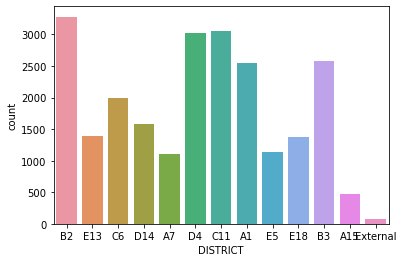

In [18]:
sns.countplot(data=crime_data, x = 'DISTRICT')

# Frequency table for crime rate w.r.t to district

In [19]:
crime_data.DISTRICT.value_counts()

B2          3281
C11         3057
D4          3026
B3          2582
A1          2544
C6          1996
D14         1583
E13         1395
E18         1380
E5          1132
A7          1103
A15          475
External      79
Name: DISTRICT, dtype: int64

# Bar graph for hourly crime rates- Continuous Distribution

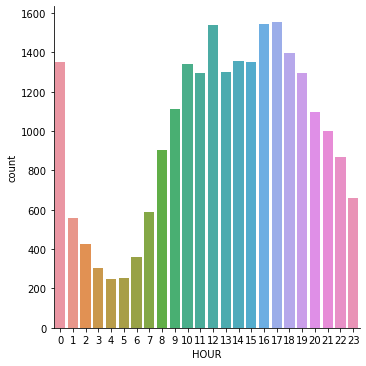

In [20]:
sns.catplot(x='HOUR', kind='count', data=crime_data)

# Continuous distribution plot for hourly crime rates

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HOUR', ylabel='Density'>

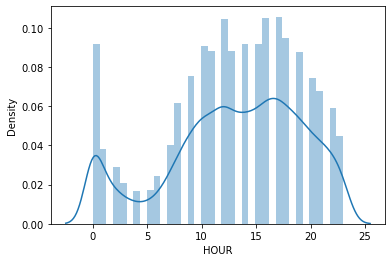

In [21]:
sns.distplot(crime_data['HOUR'])

# Multivariate analysis

### Count distribution of crime rates for different districts

<AxesSubplot:xlabel='DISTRICT', ylabel='count'>

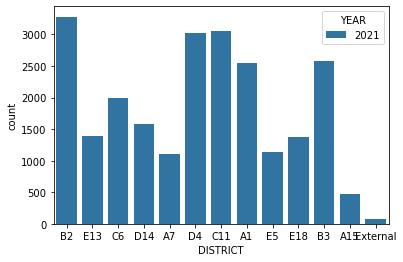

In [23]:
sns.countplot(data=crime_data, x='DISTRICT', hue='YEAR')

### Count distribution w.r.t to district

<AxesSubplot:xlabel='DISTRICT', ylabel='count'>

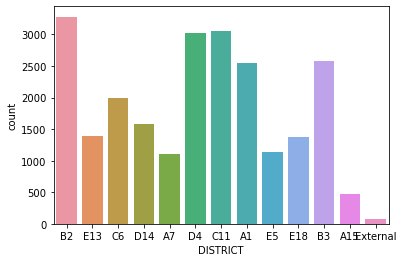

In [24]:
sns.countplot(data=crime_data, x='DISTRICT')

### Frequency table of crime rate w.r.t district

In [26]:
crime_data.DISTRICT.value_counts()

B2          3281
C11         3057
D4          3026
B3          2582
A1          2544
C6          1996
D14         1583
E13         1395
E18         1380
E5          1132
A7          1103
A15          475
External      79
Name: DISTRICT, dtype: int64

### Heat map for Boston crimes

In [ ]:
crime_map= folium.Map(location=[42.3337,-71.0919],tiles="Stamer Toner", Zoom_start= 11)
data_heatmap= crime_data[crime_data.YEAR==2021]
data_heatmap= crime_data[['Lat','Long']]
data_heatmap=crime_data.dropna(axis=0, subset=['lat','Long'])
data_heatmap=[[row['Lat'],row['Long']] for index, row in data_heatmap.iterows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)
crime_mp.save("boston_crime_map.html")